In [92]:
#Librerias a utilizar
import pandas as pd #leer data
import matplotlib.pyplot as plt #graficar

# Leer, filtrar y visualizar los datos

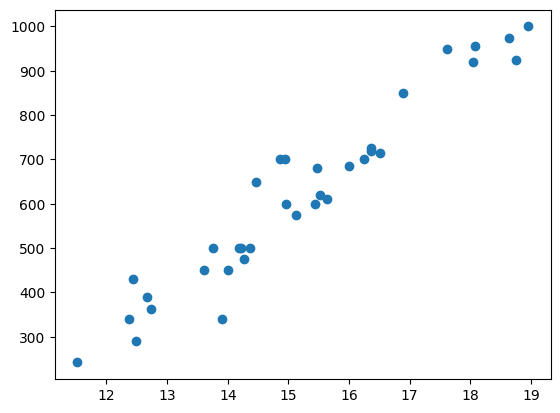

In [93]:
data = pd.read_csv('Fish.csv') #leer data
data = data[(data.Species == 'Bream')] #filtrar por especie
data = data.filter(['Weight', 'Height']) #seleccionar columnas a estudiar
X = data['Height'] #data eje x
Y = data['Weight'] #data eje y
plt.plot(X, Y, 'o')
plt.show()

# Aplicación de mínimos cuadrados

In [94]:
def min_cuadrados(x, y):
    n = len(x) #cantidad de datos
    #calculamos los términos usados en la ecuación
    k1 = sum(x * y)
    k2 = sum(x**2)
    k3 = sum(x)
    k4 = sum(y)
    #calculamos m y b a partir de la ecuación de mínimos cuadrados
    m = (n * k1 - k3 * k4) / (n * k2 - k3**2)
    b = (k2 * k4 - k3 * k1) / (n * k2 - k3**2)
    return m, b

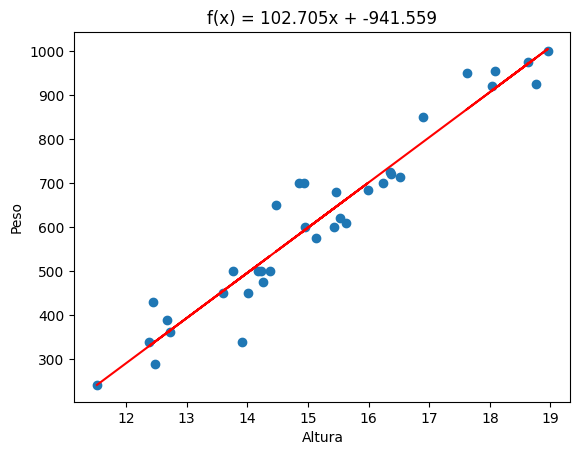

In [95]:
m,b = min_cuadrados(X,Y)
def f(x): #definicion de la funcion afin
    return m*x + b
plt.plot(X, Y, 'o')
plt.plot(X, f(X), color = 'red')
f_string = "f(x) = " + str(round(m,3)) + "x + " + str(round(b,3))
plt.title(f_string)
plt.ylabel("Peso")
plt.xlabel("Altura")
plt.show()

# Aplicacion de descenso de gradiente

In [96]:
def descenso_gradiente (x,y,alpha,tolerancia):
    n = len(x) #cantidad de datos
    #se inicializan m y b
    m = 0
    b = 0
    #definicion de la derivada parcial de la funcion de costo con respecto a m
    def dE_dm (m, b):
        return -(1/2*n)*sum((y - m*x - b)*x)
    #definicion de la derivada parcial de la funcion de costo con respecto a b
    def dE_db (m, b):
        return -(1/2*n)*sum(y - m*x - b)
    #error inicial (error = maximo de los gradientes * alpha)
    error = max(abs(dE_dm(m, b)*alpha),abs(dE_db(m, b)*alpha))
    while error > tolerancia: #mientras el error sea mayor a la tolerancia
        #se calculan los gradientes 
        deriv_m = dE_dm(m, b)
        deriv_b = dE_db(m, b)
        #se calculan m y b a partir de los grandientes
        m = m - alpha*deriv_m
        b = b - alpha*deriv_b
        #se calcula el nuevo error
        error = max(abs(dE_dm(m, b)*alpha),abs(dE_db(m, b)*alpha))
    return m, b

39650


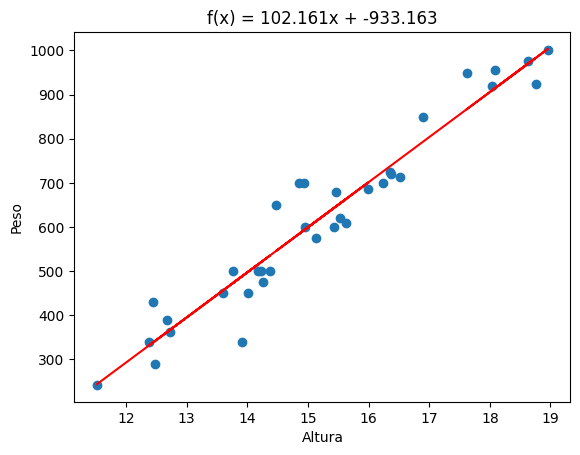

In [97]:
m,b = descenso_gradiente(X,Y, 1.22e-5, 0.001)
plt.plot(X,Y, 'o')
plt.plot(X, f(X), color = 'red')
f_string = "f(x) = " + str(round(m,3)) + "x + " + str(round(b,3))
plt.title(f_string)
plt.ylabel("Peso")
plt.xlabel("Altura")
plt.show()